<a href="https://colab.research.google.com/github/Aastha12001/Sparks2022/blob/main/Task5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Aastha Jain

Task-5 : Exploratory Data Analysis - Sports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
matches_df=pd.read_csv('/content/matches.csv') #Read the data

In [ ]:
matches_df.head() #first five rows

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [ ]:
matches_df.shape #tuple of shape of data frame

(756, 18)

In [ ]:
matches_df.info() #information about the data frame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [ ]:
matches_df.describe() #description of the data

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [ ]:
for i in matches_df.columns:
    print(i,len(matches_df[i].unique()))  #number of unique values in each column

id 756
season 12
city 33
date 546
team1 15
team2 15
toss_winner 15
toss_decision 2
result 3
dl_applied 2
winner 16
win_by_runs 89
win_by_wickets 11
player_of_match 227
venue 41
umpire1 62
umpire2 66
umpire3 26


In [ ]:
matches_df.isnull().sum() #check for null values

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [ ]:
#dropping the umpire columns to get rid of null values
matches_df=matches_df.drop(['umpire3'],axis=1)

In [ ]:
pd.concat([matches_df['team1'],matches_df['team2']]).unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

**Data Visualization**

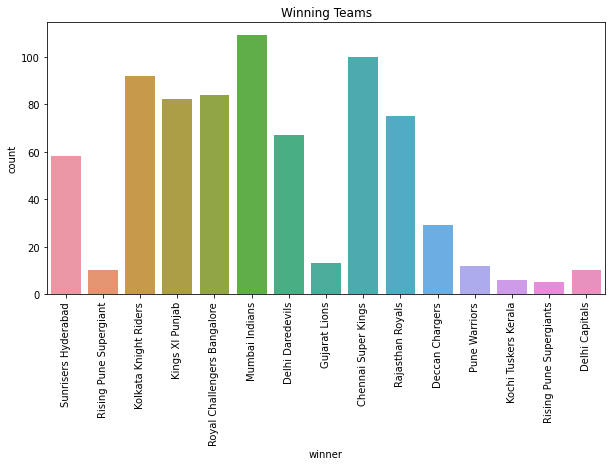

In [ ]:
#teams that won the match
plt.figure(figsize=(10,5))
sns.countplot(x='winner',data=matches_df)
plt.title('Winning Teams')
plt.xticks(rotation=90);

The maximum matches were won by team Mumbai Indians.

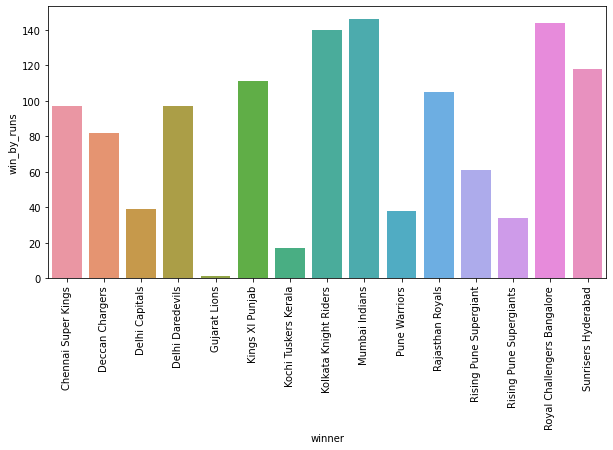

In [ ]:
#win by runs
win_max=matches_df.groupby(['winner'],as_index=False)['win_by_runs'].max()
plt.subplots(figsize=(10,5))
plt.xticks(rotation=90)
sns.barplot(win_max['winner'],win_max['win_by_runs'])

Mumbai Indians has won maximum matches by run.

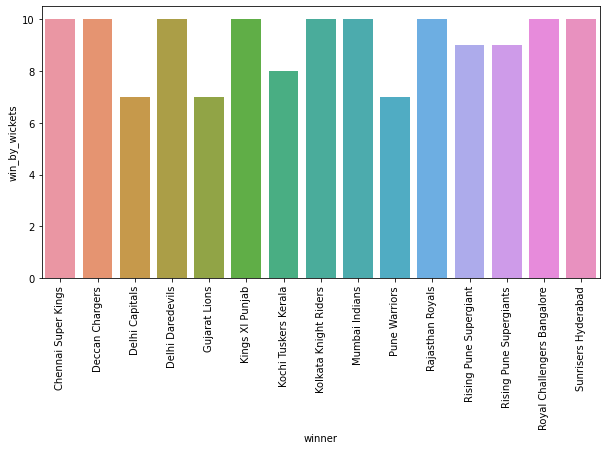

In [ ]:
win_max_=matches_df.groupby(['winner'],as_index=False)['win_by_wickets'].max()
plt.subplots(figsize=(10,5))
plt.xticks(rotation=90)
sns.barplot(win_max_['winner'],win_max_['win_by_wickets'])

In [ ]:
#man of the match winners
matches_df['player_of_match'].value_counts()[0:5]

CH Gayle          21
AB de Villiers    20
RG Sharma         17
MS Dhoni          17
DA Warner         17
Name: player_of_match, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

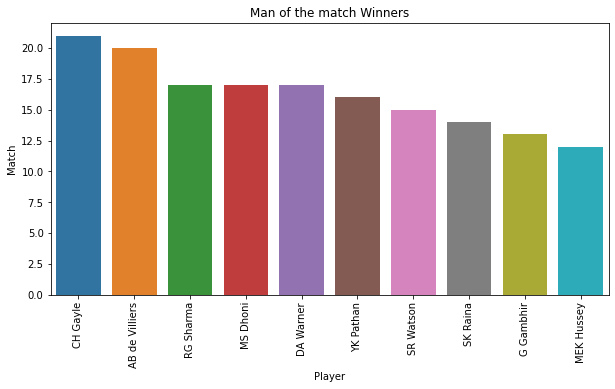

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x=matches_df.player_of_match.value_counts()[:10].index,y=matches_df.player_of_match.value_counts()[:10])
plt.title('Man of the match Winners')
plt.xlabel('Player')
plt.ylabel('Match')
plt.xticks(rotation=90)

Maximum man of match winners is CH Gayle.

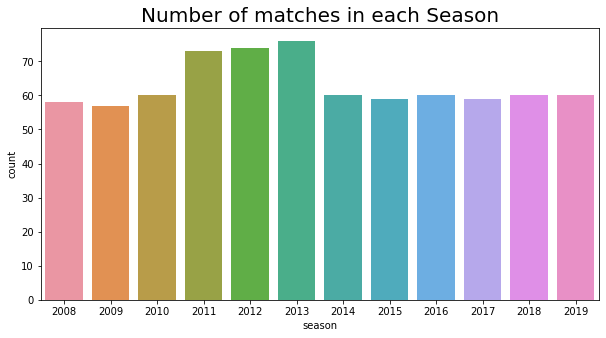

In [ ]:
#number of matches in each season
plt.subplots(figsize=(10,5))
sns.countplot(x=matches_df['season'].sort_values())
plt.title('Number of matches in each Season',fontsize=20)
plt.show()

Most matches were played in the year 2013.

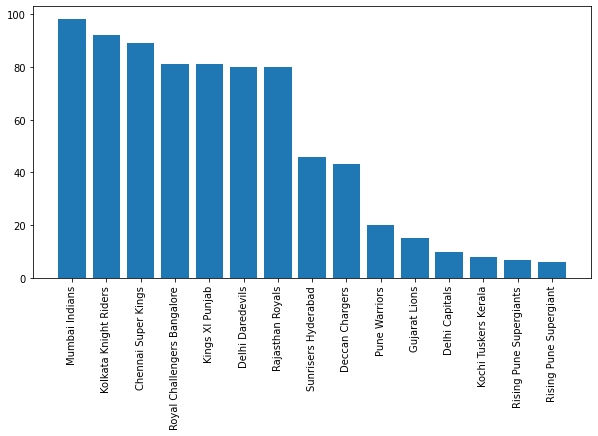

In [ ]:
#toss winners
plt.figure(figsize=(10,5))
plt.bar(list(matches_df['toss_winner'].value_counts().keys()),list(matches_df['toss_winner'].value_counts()))
plt.xticks(rotation=90)
plt.show()

Maximum tosses were won by Mumbai Indians.

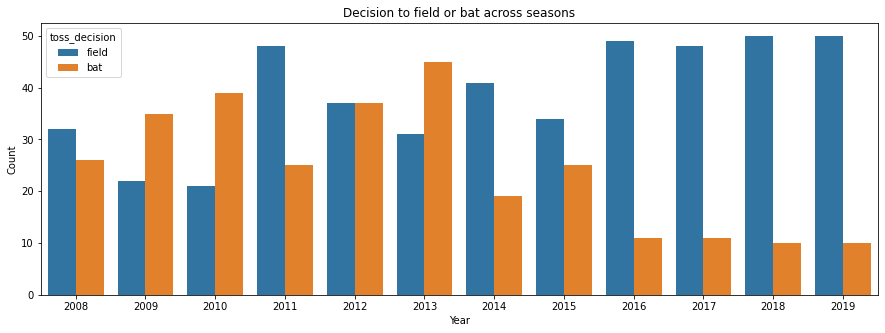

In [ ]:
#Comparison on toss decisions
plt.figure(figsize=(15,5))
sns.countplot(matches_df['season'].sort_values(),hue=matches_df['toss_decision'])
plt.title("Decision to field or bat across seasons")
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

Most of the teams decide to field first.

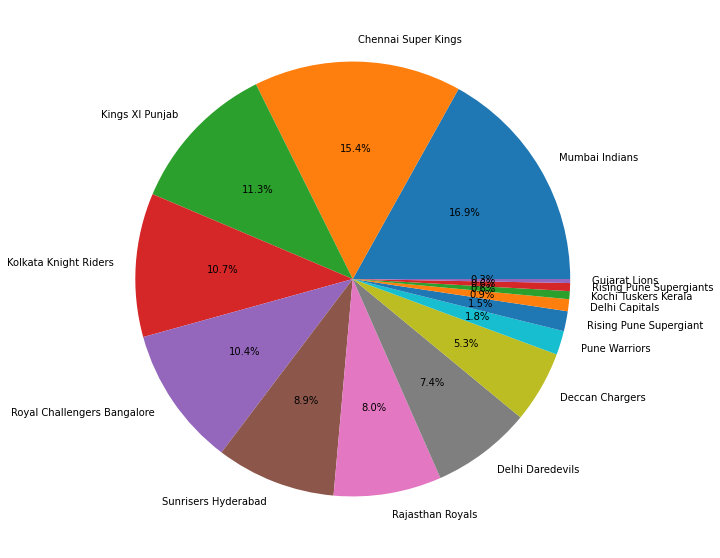

In [ ]:
#WINNING OF A TEAM AFTER BATTING ON THE FIRST POSITION 
batting_first = matches_df[matches_df['win_by_runs']!=0]
plt.figure(figsize=(10,10))
plt.pie(list(batting_first['winner'].value_counts()), labels=list(batting_first['winner'].value_counts().keys()),autopct='%0.1f%%')
plt.show()

After batting first, Mumbai Indians have won the most matches.

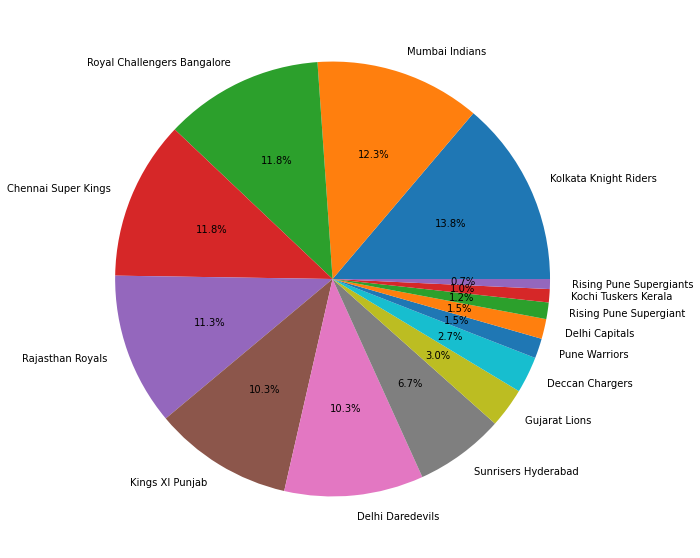

In [ ]:
#WINNING OF A TEAM AFTER BATTING ON THE SECOND POSITION
batting_second = matches_df[matches_df['win_by_wickets']!=0]
plt.figure(figsize = (10,10))
plt.pie(list(batting_second['winner'].value_counts()), labels=list(batting_second['winner'].value_counts().keys()),autopct = '%0.1f%%')
plt.show()

After batting at the second position, Mumbai Indians have won the most matches.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40]),
 <a list of 41 Text major ticklabel objects>)

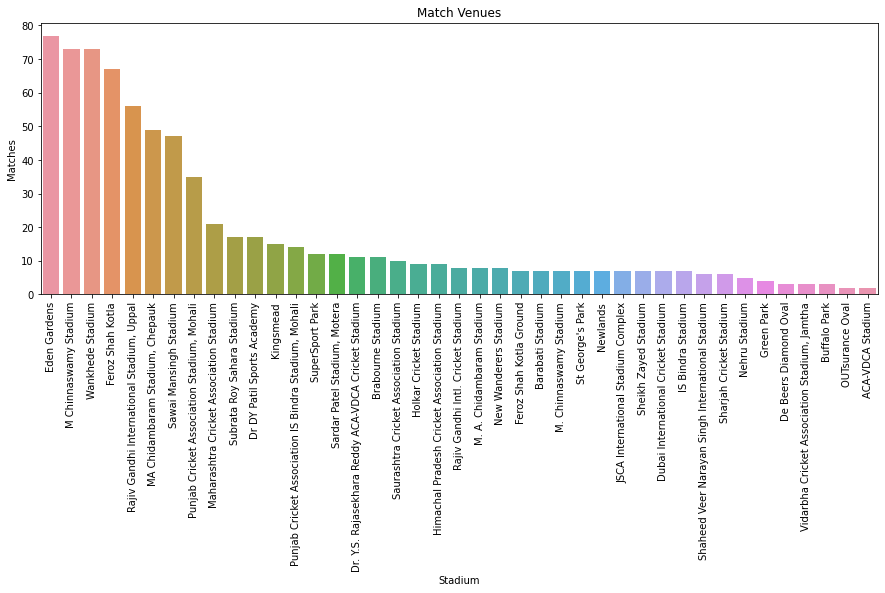

In [ ]:
#match venues
plt.subplots(figsize=(15,5))
sns.countplot(x ='venue',data = matches_df,order = matches_df['venue'].value_counts().index)
plt.title('Match Venues')
plt.xlabel('Stadium')
plt.ylabel('Matches')
plt.xticks(rotation = 90)

Most matches were played at Eden Gardens stadium.

In [ ]:
deliveries_df=pd.read_csv("deliveries.csv")

In [ ]:
deliveries_df.shape

(20736, 21)

In [ ]:
deliveries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20736 entries, 0 to 20735
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   match_id          20736 non-null  int64  
 1   inning            20736 non-null  int64  
 2   batting_team      20736 non-null  object 
 3   bowling_team      20736 non-null  object 
 4   over              20736 non-null  int64  
 5   ball              20736 non-null  int64  
 6   batsman           20736 non-null  object 
 7   non_striker       20736 non-null  object 
 8   bowler            20736 non-null  object 
 9   is_super_over     20736 non-null  int64  
 10  wide_runs         20735 non-null  float64
 11  bye_runs          20735 non-null  float64
 12  legbye_runs       20735 non-null  float64
 13  noball_runs       20735 non-null  float64
 14  penalty_runs      20735 non-null  float64
 15  batsman_runs      20735 non-null  float64
 16  extra_runs        20735 non-null  float6

In [ ]:
deliveries_df.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,20736.000000,20736.000000,20736.000000,20736.000000,20736.000000,20735.000000,20735.000000,20735.000000,20735.000000,20735.000000,20735.000000,20735.000000,20735.000000
mean,44.410831,1.476514,10.058642,3.617332,0.000627,0.037135,0.004919,0.022571,0.004389,0.000241,1.279672,0.069255,1.348927
std,25.511794,0.502253,5.645985,1.808809,0.025031,0.247043,0.114431,0.197827,0.067547,0.034723,1.646208,0.340829,1.631307
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,44.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,67.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,89.000000,4.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,2.000000,5.000000,6.000000,5.000000,7.000000


In [ ]:
#Total matches where Super over was and wasn't played
deliveries_df['is_super_over'].value_counts()

0    20723
1       13
Name: is_super_over, dtype: int64

In [ ]:
#Total runs given by exta
sum(deliveries_df['extra_runs'])

nan

In [ ]:
#Total runs given by no balls
sum(deliveries_df['noball_runs'])

nan

In [ ]:
#Total runs given on penalty
sum(deliveries_df['penalty_runs'])

nan

In [ ]:
#Total soft-dismissal of players over the years
sum(deliveries_df['player_dismissed'].value_counts())

1064

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

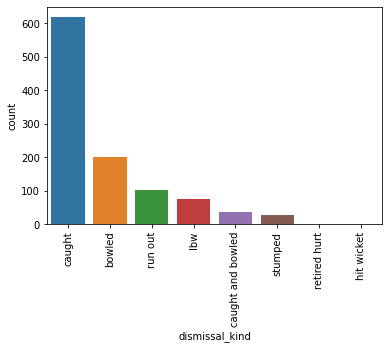

In [ ]:
#kind of dismissal
sns.countplot(x=deliveries_df['dismissal_kind'],data=deliveries_df)
plt.xticks(rotation = 90)

Caught is the most common type of dismissal.

CONCLUSION

1)Total number of matches played was 756.

2)Total seasons played was 12.

3)Winning Teams

a)Mumbai Indians : first position

b)Rising Pune Supergiants : last position   

4)Win by Runs

a)Mumbai Indians : first position

b)Gujarat Lions : last position

5)Man of the match

a)CH Gayle : first position

b)VH Kohli : last position

6)Highest number of matches per season was in 2013.

7)Mumbai Indians were the toss winners.

8)The only year with same toss for fielding and bating was on 2012.

9)Winning of the team after batting on the First and Second positions were

a) win by runs : Mumbai Indians

b) win by wickets : Kolkata Knight Riders 

10)Eden Garden is the most popular match venue.

**Thank You**